# Poisson Regression with a neural network mindset

This notebooks ilustrates the usage of a poisson regression approach as a neural network in comparison to other implementations both from baseline packages as the self proposed one using gradient descent.

## Simulation data

$$y \sim P(\lambda)$$

$$ \log{ \lambda } = \mathbf{X}\beta $$

where $\beta = [2,3]^T$ and $X$ is the design matrix given by

$$ \mathbf{X} = \begin{bmatrix}
    1 & X_{11}& X_{12} \\
    1 & X_{21}& X_{22} \\
    \vdots & \vdots & \vdots \\
    1 & X_{n1}& X_{n2} \\
\end{bmatrix} $$

* $X_1 = [x_{11} \dots x_{n1}]^T$ from an uniform distribution
* $X_2 = [x_{12} \dots x_{n2}]^T$ from an standard normal distribution

In [1]:
import os
import sys

import numpy as np
import statsmodels.api as sm
from sklearn.linear_model import PoissonRegressor

from numpy.random import poisson, random, randn

src_path = os.path.dirname(os.getcwd())
sys.path.append(src_path)

from PoissonRegression.PoissonRegression import PoissonRegression 

n = 1000
np.random.seed(0)
x1 = random(n)
x2 = randn(n)

X = np.array([x1,x2]).T
w = np.array([2, 3])
b = np.ones(n)
syst = X @ w + b
y = poisson(np.exp(syst))

## Sklearn

In [4]:
RP_model = PoissonRegressor()
RP_model.fit(X,y)
print(RP_model.coef_)
print(RP_model.intercept_)

[1.95229544 2.98436462]
1.0671373317072548


## Statsmodels

In [5]:
X_desing = np.concatenate((np.ones(X.shape[0]).reshape(-1,1), X), axis = 1)
RP3_model = sm.GLM(y, X_desing, family=sm.families.Poisson()).fit()
print(RP3_model.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                      y   No. Observations:                 1000
Model:                            GLM   Df Residuals:                      997
Model Family:                 Poisson   Df Model:                            2
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2447.4
Date:                Mon, 24 Jul 2023   Deviance:                       914.37
Time:                        22:02:15   Pearson chi2:                     933.
No. Iterations:                     8   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9926      0.007    149.302      0.0

## Proposed approach

In [6]:
RP2_model = PoissonRegression()
RP2_model.fit(X,y)
print(RP2_model.coefs)
print(RP2_model.intercept)

[2.0053205  3.00224498]
0.9916320301459898


## Neural network approach

In [3]:
import tensorflow as tf

nn_seq_model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(1, input_shape=(2,), activation=tf.exp)
])

nn_seq_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 3         
                                                                 
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


In [4]:
nn_seq_model.compile(
    optimizer='adam',
    loss='poisson'
)

hist = nn_seq_model.fit(
    X,y,
    batch_size=32,
    epochs=1000,
    verbose=0
)

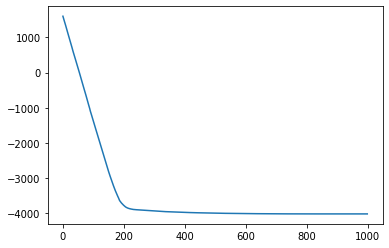

In [5]:
import matplotlib.pyplot as plt

plt.plot(hist.history['loss'])
plt.show()

In [6]:
nn_seq_model.get_weights()

[array([[1.9991673],
        [2.999284 ]], dtype=float32),
 array([0.9884352], dtype=float32)]

Next a more complex but less memory expensive and generalizable for future architectures is presented

## Batched data generator

In [2]:
import tensorflow as tf
from PoissonRegression.PoissonRegression import PoissonRegressionSyntheticData, PossionRegressionNN

poisson_regression_data = PoissonRegressionSyntheticData(
    w=tf.constant([2.,3.]), 
    b=1.,
    num_val=0,
    batch_size=32,
    seed=0
)
train_data_loader = poisson_regression_data.training_loader()

In [7]:
pr_model = PossionRegressionNN(train_data_loader.element_spec[0].shape.as_list())

pr_model.compile(
    optimizer = 'adam',
    loss = 'poisson'
)

hist = pr_model.fit(
    train_data_loader,
    epochs = 1000,
    verbose = 0
)

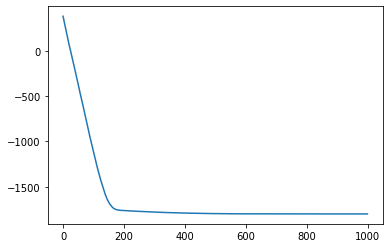

In [8]:
plt.plot(hist.history['loss'])
plt.show()

In [9]:
pr_model.get_weights()

[array([[2.0013452],
        [3.000377 ]], dtype=float32),
 array([0.9945376], dtype=float32)]